# Commodity Price Homework
#### By Caleb Eckerley and Ben Byrd
---
Data Source: https://www.kaggle.com/sc231997/crude-oil-price

In [61]:
import pandas as pd
import plotly.express as px

Here, I'm importing crude-oil-price that I've gotten from Kaggle, set the date as the index and make Date uppercase (this is a surprise tool that will help us later).

In [66]:
df = pd.read_csv("./data/crude-oil-price.csv", index_col=0, parse_dates=[0])
df = df.rename_axis("Date")
df

,price,percentChange,change
Date,,,
1983-03-30,29.27,NaN,NaN
1983-04-04,30.63,4.646396,1.36
1983-05-02,30.25,-1.240614,-0.38
1983-06-01,31.38,3.735537,1.13
1983-07-01,32.00,1.975781,0.62
...,...,...,...
2021-11-01,65.85,-19.479090,-15.93
2021-12-01,74.88,13.712984,9.03
2022-01-03,86.49,15.504808,11.61


I check the general profile of the data, paying special attention to the minimum and maximum values as well as the counts for each column. It seems that `percentChange` and `change` are both missing a single record worth of data.

In [67]:
df.describe()

,price,percentChange,change
count,469.000000,468.000000,468.000000
mean,44.071641,0.838667,0.171068
std,28.376748,10.685748,4.954575
min,10.420000,-54.244861,-32.830000
25%,20.270000,-5.040127,-1.632500
50%,30.830000,0.956201,0.280000
75%,63.580000,6.511568,2.317500
max,140.000000,88.375796,16.650000


As you can see, `the crude-oil-price.csv` file contains 469 records for `price` and 468 records for `percentChange` and `change`. This is because percentChange and change are calculated using previous price records.

The csv file also contains a `date` column that starts in the 1980s and ends in 2022.

In [68]:
df = df.sort_values(by='Date')
df

,price,percentChange,change
Date,,,
1983-03-30,29.27,NaN,NaN
1983-04-04,30.63,4.646396,1.36
1983-05-02,30.25,-1.240614,-0.38
1983-06-01,31.38,3.735537,1.13
1983-07-01,32.00,1.975781,0.62
...,...,...,...
2021-11-01,65.85,-19.479090,-15.93
2021-12-01,74.88,13.712984,9.03
2022-01-03,86.49,15.504808,11.61


Though the data is already clean, I've sorted by index column `date` just in case.

The data is not in a "wide" format so there's no need to "melt" it.

In [69]:
df

,price,percentChange,change
Date,,,
1983-03-30,29.27,NaN,NaN
1983-04-04,30.63,4.646396,1.36
1983-05-02,30.25,-1.240614,-0.38
1983-06-01,31.38,3.735537,1.13
1983-07-01,32.00,1.975781,0.62
...,...,...,...
2021-11-01,65.85,-19.479090,-15.93
2021-12-01,74.88,13.712984,9.03
2022-01-03,86.49,15.504808,11.61


Here, I've visualized the data.

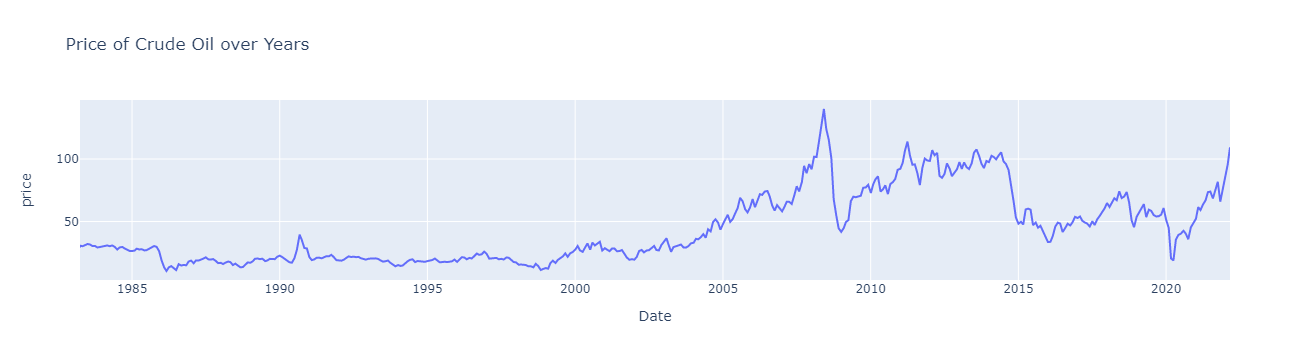

In [71]:
fig = px.line(df, y='price', title='Price of Crude Oil over Years')
fig.show()

It isn't known if the data is already adjusted to 2022 dollars, however, for sake of argument and the assignment, we've assumed that it is not adjusted in 2022 dollars. To adjust the `price` column, we've imported a consumer price index dataset.

In [72]:
cpi_df = pd.read_csv("./data/cpi-u.csv", header=11).drop(columns=['HALF1','HALF2'])

In [73]:
cpi_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1913,9.800,9.800,9.800,9.800,9.700,9.800,9.900,9.900,10.000,10.000,10.100,10.000
1,1914,10.000,9.900,9.900,9.800,9.900,9.900,10.000,10.200,10.200,10.100,10.200,10.100
2,1915,10.100,10.000,9.900,10.000,10.100,10.100,10.100,10.100,10.100,10.200,10.300,10.300
3,1916,10.400,10.400,10.500,10.600,10.700,10.800,10.800,10.900,11.100,11.300,11.500,11.600
4,1917,11.700,12.000,12.000,12.600,12.800,13.000,12.800,13.000,13.300,13.500,13.500,13.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
106,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974
107,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474
108,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802


As you can see, the data is fairly wide and not in a format that is particularly helpful. Therefore, we need to melt it.

In [74]:
cpi_raw = cpi_df.melt(id_vars=['Year'], var_name='Month', value_name='CPI')
cpi_raw

,Year,Month,CPI
0,1913,Jan,9.800
1,1914,Jan,10.000
2,1915,Jan,10.100
3,1916,Jan,10.400
4,1917,Jan,11.700
...,...,...,...
1315,2018,Dec,251.233
1316,2019,Dec,256.974
1317,2020,Dec,260.474
1318,2021,Dec,278.802


We've melted the data, now we need to create date-time objects with the data and get rid of some unwanted data.

In [75]:
cpi_raw['Date'] = pd.to_datetime(cpi_raw['Year'].astype(str) + '-' + cpi_raw['Month'])
cpi_raw = cpi_raw.set_index('Date').sort_index()
cpi_raw = cpi_raw.drop(['Year', 'Month'], axis='columns')
cpi = cpi_raw.dropna()

In [76]:
cpi

,CPI
Date,
1913-01-01,9.800
1913-02-01,9.800
1913-03-01,9.800
1913-04-01,9.800
1913-05-01,9.700
...,...
2021-10-01,276.589
2021-11-01,277.948
2021-12-01,278.802


Now we graph the data to make sure it looks correct and compare it to the example given in class.

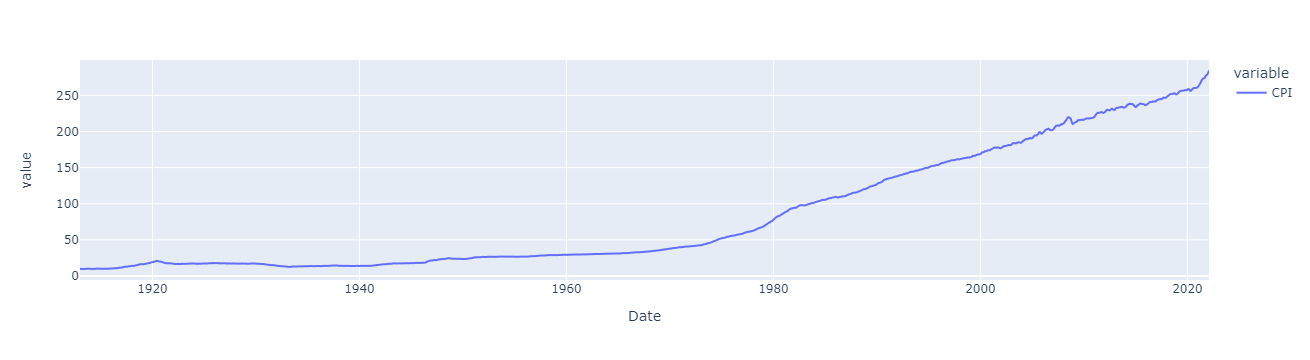

In [77]:
px.line(cpi)

We can now merge the cpi dataset and the oil dataset to being to make our calculations.

In [78]:
cpi_oil = pd.merge(cpi, df, on='Date')
cpi_oil

,CPI,price,percentChange,change
Date,,,,
1983-06-01,99.500,31.38,3.735537,1.13
1983-07-01,99.900,32.00,1.975781,0.62
1983-08-01,100.200,31.59,-1.281250,-0.41
1983-09-01,100.700,30.36,-3.893637,-1.23
1983-11-01,101.200,29.23,-3.753704,-1.14
...,...,...,...,...
2021-09-01,274.310,75.03,9.532847,6.53
2021-10-01,276.589,81.78,8.996401,6.75
2021-11-01,277.948,65.85,-19.479090,-15.93


Here, we calculate the adjusted prices for oil over the years. This is done by taking the original `price` and multiplying it by the `CPI`. Then we divide our result by the `CPI` associated with the year 2022 (the last entry). Our result gives us the historic oil price data in 2022 dollars.

In [90]:
in_2022_dollars = cpi_oil['price'] * cpi_oil['CPI'] / cpi_oil.iloc[-1]['CPI']
in_2022_dollars

Date
1983-06-01    11.005054
1983-07-01    11.267606
1983-08-01    11.156643
1983-09-01    10.775748
1983-11-01    10.426187
                ...    
2021-09-01    72.542540
2021-10-01    79.725671
2021-11-01    64.511257
2021-12-01    73.583068
2022-02-01    95.720000
Length: 305, dtype: float64

Now we can graph our results.

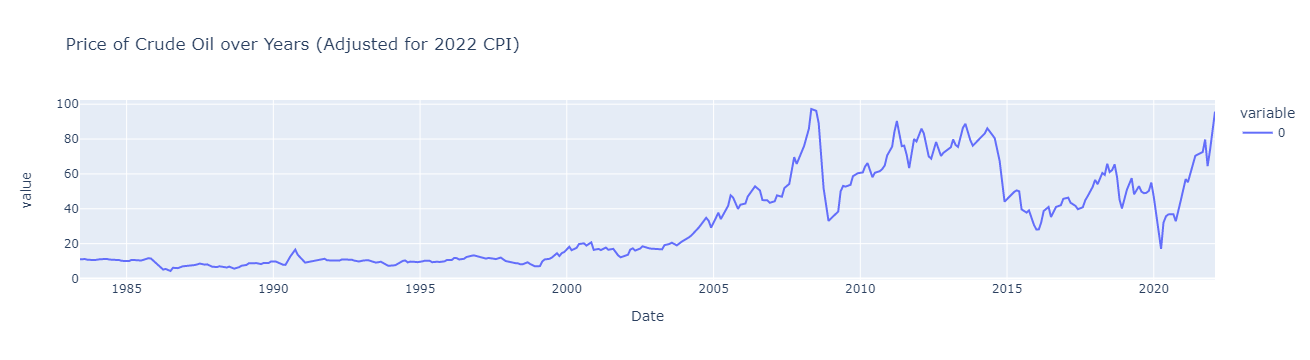

In [85]:
px.line(in_2022_dollars, title='Price of Crude Oil over Years (Adjusted for 2022 CPI)')

At first, it looks like nothing has changed. However, if you compare the original graph with the adjusted graph you can see that the hike in price in about 2008 surpassed 100 dollars wheras here it does not.